In [6]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] 

In [2]:
raw_expre = pd.read_csv('datasets/GSE121239/GSE121239/raw_expre.csv', sep=",")  
raw_expre 

,Unnamed: 0,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
0,1007_PM_s_at,4.955257,4.870351,4.889382,4.956931,4.518659,4.039076,4.363994,4.474612,4.109501,...,4.143518,4.163726,3.552997,4.688624,4.101748,3.987773,4.674258,4.855265,5.227129,5.702039
1,1053_PM_at,5.984784,6.119432,5.914195,5.887814,5.962590,6.213503,6.523682,6.630676,6.424815,...,5.601486,5.307239,5.585876,6.538760,6.420332,5.949633,5.587069,6.032248,6.317659,6.449117
2,117_PM_at,9.477945,9.828793,9.719707,9.148228,9.378308,9.688581,8.985668,10.329326,8.890190,...,9.077410,9.349135,9.554533,9.941707,10.278584,9.672171,8.650779,9.264324,9.430051,9.660996
3,121_PM_at,4.553229,4.487615,4.645168,4.681996,4.990632,4.762670,4.528352,4.693206,3.875943,...,5.177162,4.961182,5.267552,4.404966,4.013917,4.234865,4.418242,4.269110,4.115500,4.135403
4,1255_PM_g_at,1.921190,2.169639,2.410481,1.885852,1.987256,2.029976,2.110129,2.136902,2.169476,...,2.224418,2.158327,2.316911,1.942149,1.929420,1.862300,1.842566,2.258901,1.951895,1.896087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,AFFX-ThrX-5_at,2.365662,2.344025,2.537787,2.140112,2.381164,8.440270,8.646316,8.013230,8.402119,...,2.192767,2.476008,2.580959,2.440795,2.469701,2.252614,3.157310,2.106090,2.005743,2.026090
54711,AFFX-ThrX-M_at,2.277690,2.480338,2.475397,2.749770,2.593526,9.183744,9.454726,8.446197,9.143964,...,2.639253,2.443756,2.271883,2.293643,2.424896,2.411526,2.435952,2.237814,2.377712,2.230381
54712,AFFX-TrpnX-3_at,1.897895,1.632143,1.534480,1.484037,1.949685,1.589518,1.552478,1.641031,1.505580,...,1.738948,1.855197,1.884866,1.881311,1.598604,1.661921,1.836948,1.777169,1.550851,1.626575
54713,AFFX-TrpnX-5_at,2.335483,2.280212,2.479271,2.404451,2.560628,2.382748,2.314126,2.433191,2.334751,...,2.822136,2.517637,2.529161,2.802461,2.411997,2.470162,2.490672,2.299285,2.253745,2.420385


In [3]:
"""
Filter only SLE patients 
"""

pheno = pd.read_csv('datasets/GSE121239/GSE121239/pheno.csv', sep=",")  
sle = list(pheno[pheno['disease state:ch1']!='Healthy']['geo_accession']) 
sle.append('Unnamed: 0')
raw_expre = raw_expre[sle] 
raw_expre 

,GSM3428330,GSM3428331,GSM3428332,GSM3428333,GSM3428334,GSM3428335,GSM3428336,GSM3428337,GSM3428338,GSM3428339,...,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621,Unnamed: 0
0,4.231006,4.698801,3.910390,3.580336,3.070567,4.478030,4.147879,4.446085,4.395240,4.379844,...,4.163726,3.552997,4.688624,4.101748,3.987773,4.674258,4.855265,5.227129,5.702039,1007_PM_s_at
1,6.468179,6.169779,6.581117,6.092602,6.173526,6.263135,6.278526,6.114206,5.195344,6.104809,...,5.307239,5.585876,6.538760,6.420332,5.949633,5.587069,6.032248,6.317659,6.449117,1053_PM_at
2,10.030950,9.236338,9.809446,9.241966,8.533765,8.249204,9.411319,8.909427,9.018216,9.476193,...,9.349135,9.554533,9.941707,10.278584,9.672171,8.650779,9.264324,9.430051,9.660996,117_PM_at
3,4.773703,4.512929,4.561124,4.580938,4.450634,4.920526,4.753306,4.700769,4.908958,4.976750,...,4.961182,5.267552,4.404966,4.013917,4.234865,4.418242,4.269110,4.115500,4.135403,121_PM_at
4,1.859223,2.181506,2.388049,2.213596,2.131014,2.169403,2.346246,1.924371,2.450833,2.239764,...,2.158327,2.316911,1.942149,1.929420,1.862300,1.842566,2.258901,1.951895,1.896087,1255_PM_g_at
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,2.478535,2.559616,2.436025,2.241423,2.503713,2.434743,2.330240,2.211281,2.163433,2.766547,...,2.476008,2.580959,2.440795,2.469701,2.252614,3.157310,2.106090,2.005743,2.026090,AFFX-ThrX-5_at
54711,2.622370,3.040835,2.676659,2.290952,2.805299,2.526998,2.481073,2.373959,2.595834,2.442656,...,2.443756,2.271883,2.293643,2.424896,2.411526,2.435952,2.237814,2.377712,2.230381,AFFX-ThrX-M_at
54712,1.710527,2.023230,2.044745,1.684719,2.456871,1.845374,1.949274,1.586391,1.803011,1.936196,...,1.855197,1.884866,1.881311,1.598604,1.661921,1.836948,1.777169,1.550851,1.626575,AFFX-TrpnX-3_at
54713,2.697640,2.768761,2.844855,2.559275,2.754008,2.855980,2.647197,2.413606,2.647895,3.049987,...,2.517637,2.529161,2.802461,2.411997,2.470162,2.490672,2.299285,2.253745,2.420385,AFFX-TrpnX-5_at


In [4]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212418_PM_at', '212420_PM_at'],
            'IRF1': ['202531_PM_at', '238725_PM_at'], 
            'SYNGR1': ['204287_PM_at', '213854_PM_at', '210613_PM_s_at'] 
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][0] 
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0] 

## Gene Plots (for ELF1 / IRF1 / SYNGR1)

<AxesSubplot:xlabel='Sample_number', ylabel='ELF1'>

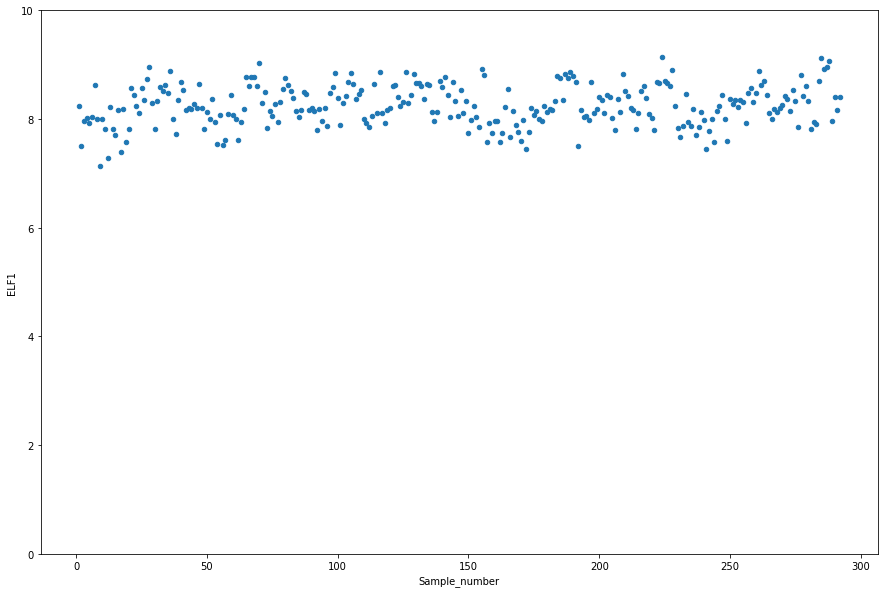

In [7]:
"""
ELF1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==elf1].T.drop(['Unnamed: 0']) 
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=21723, ylim=(0, 10), ylabel='ELF1') 

<AxesSubplot:xlabel='Sample_number', ylabel='IRF1'>

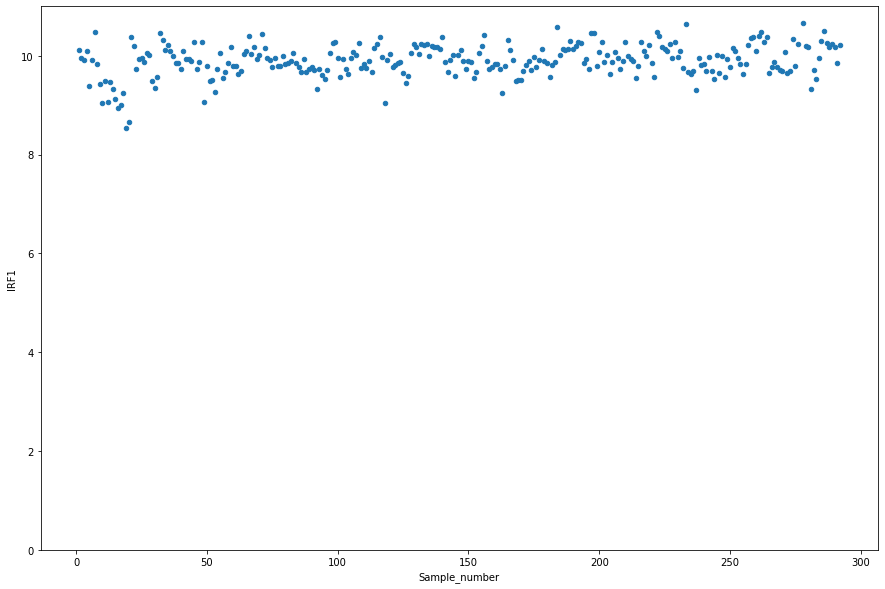

In [8]:
"""
IRF1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==irf1].T.drop(['Unnamed: 0']) 
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=11979, ylim=(0, 11), ylabel='IRF1') 

<AxesSubplot:xlabel='Sample_number', ylabel='SYNGR1'>

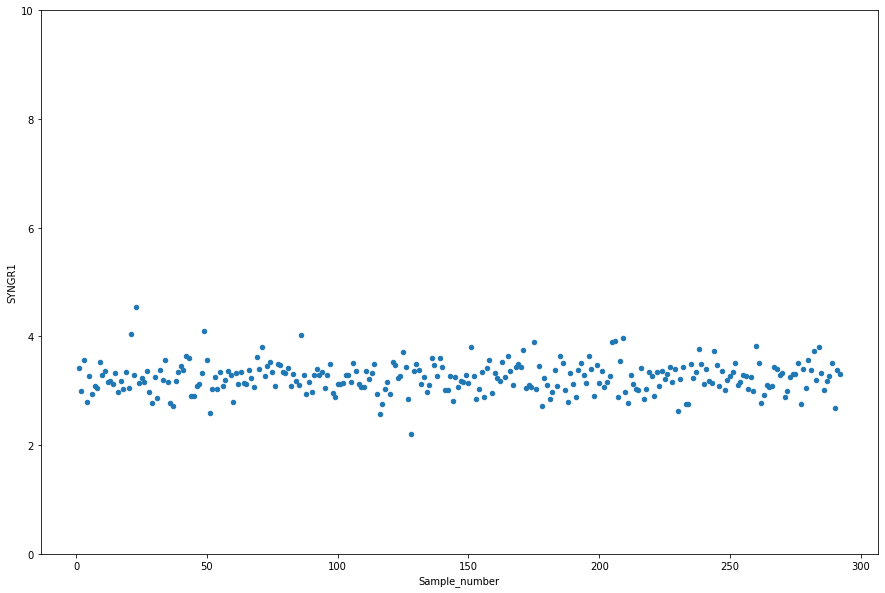

In [9]:
"""
SYNGR1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==syngr1].T.drop(['Unnamed: 0']) 
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=13734, ylim=(0, 10), ylabel='SYNGR1') 

Text(0, 0.5, 'Gene Value')

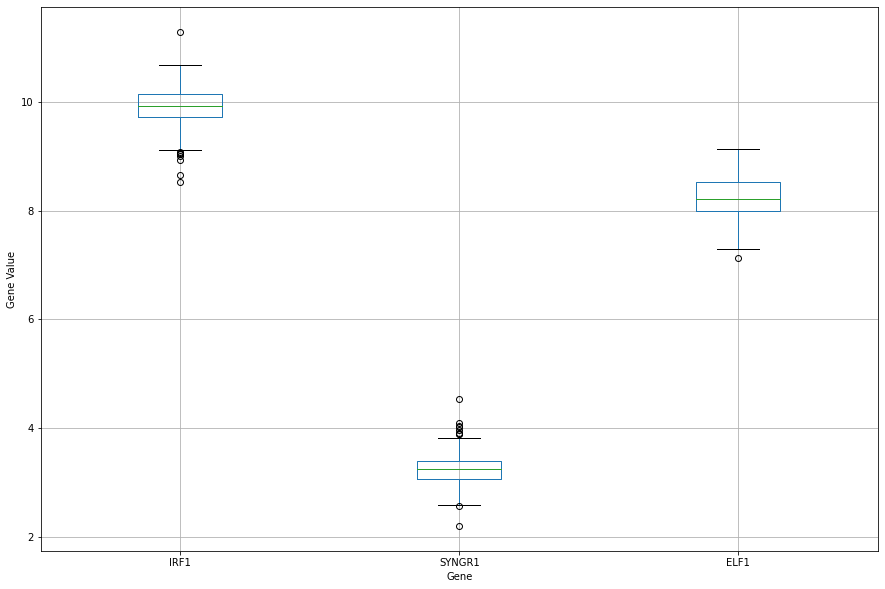

In [10]:
""" 
Box plot 
"""

df = raw_expre[(raw_expre['Unnamed: 0']==syngr1) | (raw_expre['Unnamed: 0']==elf1) | (raw_expre['Unnamed: 0']==irf1)] 
df = df.T.drop(['Unnamed: 0']) 
df=df.astype(float) 
df.boxplot(column=[11979, 13734, 21723]).set_xticklabels(['IRF1', 'SYNGR1', 'ELF1']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

## Distribution of Data 

#### Means of genes vs number of genes with that mean. Or a histogram of means of genes for all samples. 

Text(0, 0.5, 'number of samples')

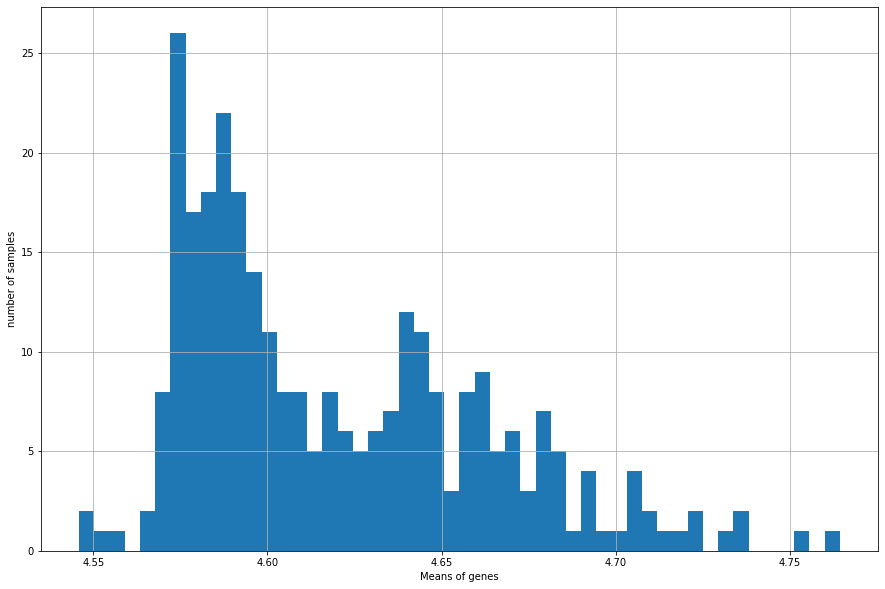

In [11]:
raw_expre.T.drop(['Unnamed: 0']).T.mean().hist(bins=50) 
plt.xlabel("Means of genes")
plt.ylabel("number of samples")

Text(0, 0.5, 'number of genes')

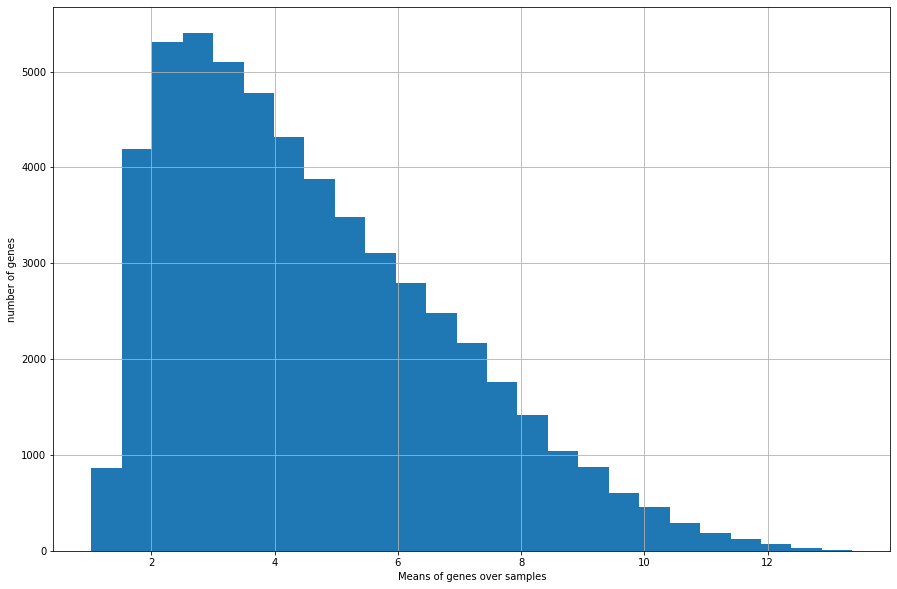

In [12]:
raw_expre.drop(['Unnamed: 0'], axis=1).mean(axis=1).hist(bins=25) 
plt.xlabel("Means of genes over samples")
plt.ylabel("number of genes") 

## Coefficient of variation Plot 

In [13]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 
raw_expre['CV'] = raw_expre.apply(lambda row : cv(row.T.drop(['Unnamed: 0'])), axis = 1) 
raw_expre['Gene_number'] = range(1, len(raw_expre) + 1) 

/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_52681/1933455964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_expre['CV'] = raw_expre.apply(lambda row : cv(row.T.drop(['Unnamed: 0'])), axis = 1)
/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_52681/1933455964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_expre['Gene_number'] = range(1, len(raw_expre) + 1)


<AxesSubplot:xlabel='Gene_number', ylabel='CV'>

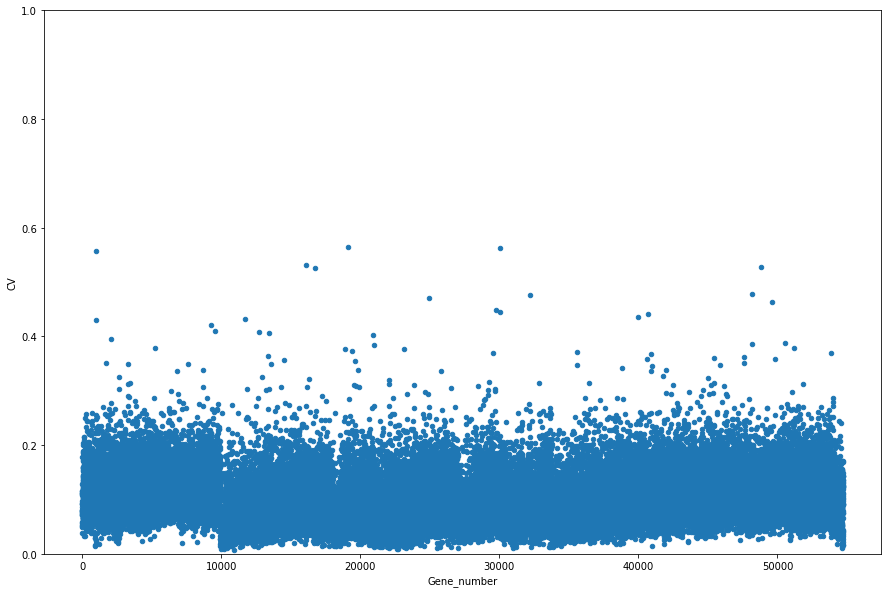

In [14]:
raw_expre.plot.scatter(x='Gene_number', y='CV', ylim=(0, 1)) 

<AxesSubplot:xlabel='Gene_number', ylabel='CV'>

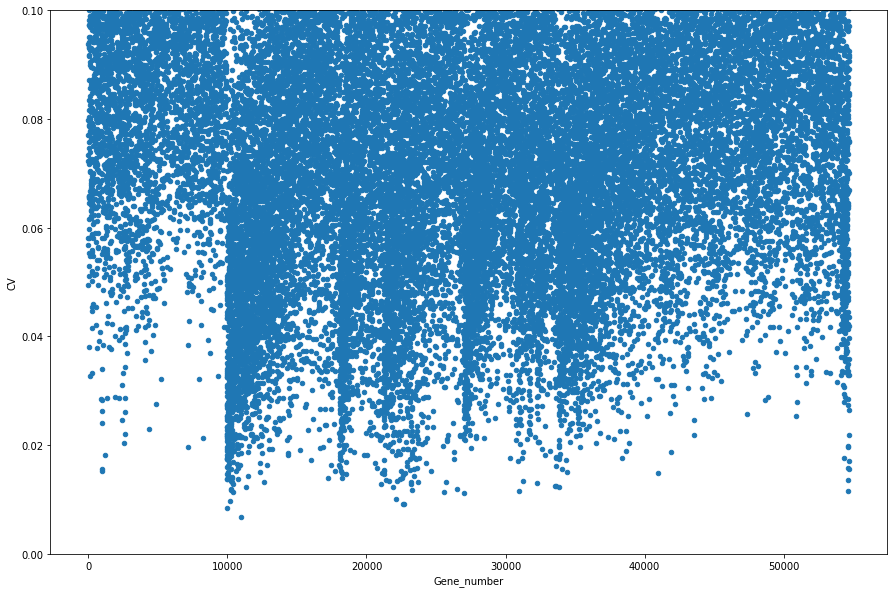

In [15]:
raw_expre.plot.scatter(x='Gene_number', y='CV', ylim=(0, 0.1)) 

#### Min coefficient of variation 

In [16]:
raw_expre['CV'].min()

0.006820162357381012

#### Max coefficient of variation 

In [17]:
raw_expre['CV'].max()

0.5637916315365084

#### Coefficient of variation less than 1 

In [18]:
raw_expre[raw_expre['CV']<0.05] 

,GSM3428330,GSM3428331,GSM3428332,GSM3428333,GSM3428334,GSM3428335,GSM3428336,GSM3428337,GSM3428338,GSM3428339,...,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621,Unnamed: 0,CV,Gene_number
5,7.738416,7.544033,7.684060,8.146089,6.962408,7.099785,7.889836,8.087509,8.271894,8.202751,...,7.554671,8.580205,7.906560,7.470552,7.490315,8.448537,8.114021,1294_PM_at,0.049399,6
11,6.523648,6.116318,6.590432,6.456376,6.089850,6.380550,6.877266,6.515719,6.359028,5.589237,...,6.067207,6.313449,6.351740,6.339993,6.020172,6.326821,6.128183,1487_PM_at,0.038141,12
125,8.927749,8.665834,9.132529,9.498476,8.594763,9.229956,9.451635,9.184275,8.742834,8.768354,...,9.392441,9.044383,9.338739,9.562527,9.383626,8.943554,9.199235,1552426_PM_a_at,0.032680,126
230,9.539009,9.640614,9.469636,9.875495,9.681917,10.190070,10.003291,9.996586,9.640866,9.743714,...,9.926022,9.823461,9.986750,10.175068,10.193342,10.462910,10.381160,1552584_PM_at,0.033252,231
250,8.073224,7.488763,7.512316,7.713648,7.372965,8.399693,7.978951,7.626275,7.221846,7.777213,...,8.265162,7.748609,8.027825,8.074449,8.156261,8.191898,8.596294,1552613_PM_s_at,0.044602,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54687,10.573628,11.192548,10.697167,10.286036,10.843764,11.615090,10.287117,10.152905,10.377574,11.258731,...,10.819449,10.000433,9.990244,9.790873,10.775514,9.955033,10.061096,AFFX-r2-Ec-bioC-5_at,0.035878,54688
54688,12.109287,12.502407,11.581182,11.764918,11.905521,12.568716,11.632060,11.865934,11.751041,12.058922,...,12.258171,11.899173,11.909470,11.528059,12.704621,11.732537,11.809097,AFFX-r2-Ec-bioD-3_at,0.026489,54689
54689,12.370251,12.525740,12.006309,11.857093,11.913843,12.409830,11.473394,12.098164,12.008895,12.232467,...,12.478607,11.981583,11.988134,11.566799,12.417920,11.968478,11.979043,AFFX-r2-Ec-bioD-5_at,0.021890,54690
54690,13.732815,13.611077,13.339941,13.424801,13.419461,13.708821,13.359113,13.209918,12.939034,13.458690,...,13.778893,13.359825,13.448374,13.369460,13.678963,13.108090,13.177597,AFFX-r2-P1-cre-3_at,0.017094,54691


#### Coefficient of variation of ELF1 / IRF1 / SYNGR1 

In [19]:
raw_expre[raw_expre['Unnamed: 0']==elf1]['CV'] 

21723    0.044846
Name: CV, dtype: float64

In [20]:
raw_expre[raw_expre['Unnamed: 0']==irf1]['CV']

11979    0.033759
Name: CV, dtype: float64

In [21]:
raw_expre[raw_expre['Unnamed: 0']==syngr1]['CV']

13734    0.087041
Name: CV, dtype: float64

## Filtering dataset based on Coefficient of Variance 

In [22]:
sorted_raw_expre = raw_expre.sort_values(by='CV', ascending=False, ignore_index=True) 

In [23]:
sorted_raw_expre

,GSM3428330,GSM3428331,GSM3428332,GSM3428333,GSM3428334,GSM3428335,GSM3428336,GSM3428337,GSM3428338,GSM3428339,...,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621,Unnamed: 0,CV,Gene_number
0,3.579926,6.124578,3.203393,3.528110,2.385768,3.459544,2.133753,2.398435,3.055870,2.569771,...,8.400133,8.988106,9.226476,8.746456,8.955135,9.237684,9.202074,209728_PM_at,0.563792,19137
1,2.842738,2.682054,2.059746,1.749195,2.011790,2.114570,1.966172,1.474586,1.484263,2.136546,...,2.081927,1.491058,1.836256,1.557915,1.710734,2.006908,1.596203,220785_PM_at,0.563374,30070
2,3.139182,3.376284,3.863300,2.790501,1.712255,1.704808,1.572629,1.949244,1.457556,2.196344,...,1.866598,1.999138,2.702625,1.332840,1.557166,1.535740,1.090514,1553604_PM_at,0.557843,988
3,3.379386,3.254148,2.979145,3.636590,3.385657,3.583003,2.849386,3.106152,2.809987,2.853698,...,3.334598,3.630816,3.403138,3.233164,3.488713,3.060555,2.994211,206632_PM_s_at,0.532090,16079
4,2.191747,2.613900,2.267238,2.171856,2.369583,2.364192,1.981239,1.900175,1.859228,2.197514,...,3.589296,1.809445,2.025248,7.302316,7.011865,7.360497,7.595216,239591_PM_at,0.528475,48841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,12.890151,12.469059,12.995337,12.784756,12.625488,12.401238,12.803810,12.680709,12.650019,12.240029,...,12.827596,12.839459,12.607702,12.453852,12.482060,12.567841,12.607481,200748_PM_s_at,0.009773,10197
54711,12.260113,12.375543,12.247797,12.427108,12.525873,12.390094,12.355006,12.406933,12.306445,12.381656,...,12.498369,12.299724,12.411400,12.507320,12.438849,12.261441,12.269833,213350_PM_at,0.009252,22652
54712,12.225765,12.229824,12.321226,12.517212,12.652262,12.297288,12.477861,12.444771,12.440024,12.317972,...,12.471668,12.298256,12.471564,12.578245,12.467244,12.431956,12.395443,213377_PM_x_at,0.009163,22679
54713,12.495264,12.493841,12.656461,12.757954,12.745686,12.561204,12.660369,12.780976,12.549061,12.724237,...,12.605418,12.691460,12.854068,12.805795,12.589401,12.755111,12.683114,200031_PM_s_at,0.008428,9973


In [24]:
sorted_raw_expre[sorted_raw_expre['Unnamed: 0']==elf1].index 

Int64Index([51107], dtype='int64')

In [25]:
sorted_raw_expre[sorted_raw_expre['Unnamed: 0']==irf1].index 

Int64Index([53387], dtype='int64')

In [26]:
sorted_raw_expre[sorted_raw_expre['Unnamed: 0']==syngr1].index 

Int64Index([33016], dtype='int64')